# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [2]:
# 관련 라이브러리 및 모듈 Import
from Font_setting import get_font
get_font()
import numpy as np
import matplotlib.pyplot as plt

Nanum YaCaeJangSuBaegGeumRye
Nanum DaeHanMinGugYeorSaCe
Nanum SonPyeonJiCe
NanumSquare Neo Light
NanumSquare Neo Bold
Nanum AJumMaJaYu
NanumBarunGothic YetHangul
Nanum SeHwaCe
Nanum YeonJiCe
Nanum SoBangGwanEuiGiDo
Nanum DdaDdeusHanJagByeor
Nanum BiSangCe
Nanum JeomGgorCe
Nanum NaMuJeongWeon
Nanum BugGeugSeong
Nanum AGiSaRangCe
Nanum DongHwaDdoBag
Nanum DaHaengCe
Nanum SiUGwiYeoWeo
Nanum YeorAHobEuiBanJjagIm
Nanum OeHarMeoNiGeurSsi
Nanum JungHagSaeng
Nanum HeuiMangNuRi
Nanum SoMiCe
Nanum HaengBogHanDoBi
Nanum BaReunJeongSin
Nanum GoRyeoGeurGgor
Nanum DaJinCe
Nanum BaegEuiEuiCeonSa
Nanum SeongSirCe
NanumSquare Neo OTF Heavy
Nanum JangMiCe
Nanum MuGungHwa
Nanum NeuRisNeuRisCe
Nanum HaNaDoeEoSonGeurSsi
Nanum Brush Script OTF
Nanum GimYuICe
Nanum DungGeunInYeon
Nanum Brush Script
Nanum HyeJunCe
Nanum GarMaesGeur
Nanum JaBuSimJiU
NanumSquare Neo ExtraBold
Nanum MasIssNeunCe
Nanum GgocNaeEum
NanumSquare Neo OTF Bold
Nanum HaRamCe
Nanum SinHonBuBu
Nanum YeoReumGeurSsi
Nanum OenSonJabIDoYeBbeo

In [7]:
import warnings
import pandas as pd 
warnings.filterwarnings(action='ignore')

# 0. 데이터 수집, 탐색, 준비

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
#from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from get_MSE import get_score # mse,rmse,r2구하는 함수
diab =load_diabetes()

####  데이터셋에 대한 설명 및 정보 확인

In [ ]:
# 데이터셋 정보확인

#### 데이터프레임 변환

In [ ]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [8]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인
diab_df = pd.DataFrame(data=diab.data, columns = diab.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
# 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거
diab_df[diab_df.isna()].sum()

age    0.0
sex    0.0
bmi    0.0
bp     0.0
s1     0.0
s2     0.0
s3     0.0
s4     0.0
s5     0.0
s6     0.0
dtype: float64

In [12]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [14]:
# X(독립변수), Y(종속변수) 분할
X = diab.data
y = diab.target

In [16]:
# 학습용, 평가용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((309, 10), (133, 10))

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

In [18]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=diab.feature_names + ['R2 scores'])
comp_df

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


In [ ]:
#각 모델별, 규제강도별 평가지표 저장

# 1. 규제가 없는 선형모델

In [23]:
#모델 구축 및 학습
model_Lr = LinearRegression()
model_Lr.fit(X_train,y_train)
#모델 평가
y_pred = model_Lr.predict(X_test)

# 회귀 계수 확인
get_score(y_test, y_pred)
Lr_coef = pd.Series(model_Lr.coef_ , index= diab.feature_names)
Lr_coef

mse is 2821.75
rmse is 53.12
r2 is 0.48


age     29.254013
sex   -261.706469
bmi    546.299723
bp     388.398341
s1    -901.959668
s2     506.763241
s3     121.154351
s4     288.035267
s5     659.268951
s6      41.376701
dtype: float64

- 계수값 시각화

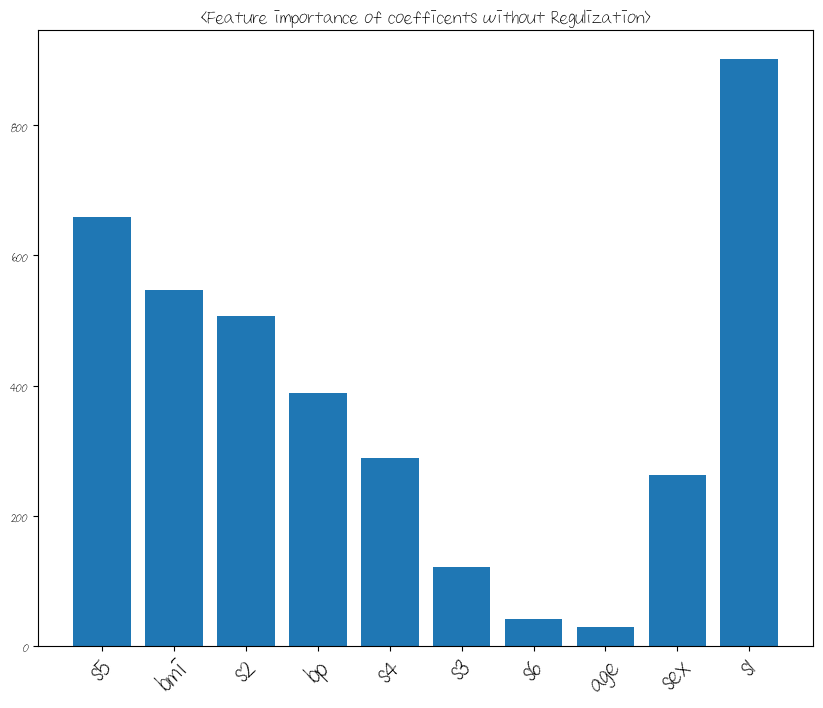

In [37]:
Lr_coef = Lr_coef.sort_values(ascending=False)
import seaborn as sns
coef = np.abs(Lr_coef)
# 시각화
plt.figure(figsize=(10,8))
plt.bar(Lr_coef.index, coef.values)
plt.title('<Feature importance of coefficents without Regulization>', fontsize=15)
plt.xticks(coef.index, rotation=45, fontsize=20)
plt.show()

In [40]:
# 모델별 비교 데이터프레임 열 추가
comp_df['LR'] = np.append(model_Lr.coef_, r2_score(y_test,y_pred))
comp_df

,LR
age,29.254013
sex,-261.706469
bmi,546.299723
bp,388.398341
s1,-901.959668
s2,506.763241
s3,121.154351
s4,288.035267
s5,659.268951
s6,41.376701


# 1. 릿지 모델

In [42]:
model_Ridge = Ridge(alpha=1)
model_Ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [54]:
y_test.shape

(133,)

In [44]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1
y_pred = model_Ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
# a=1일때 회귀 계수 확인
Ridge_coef = model_Ridge.coef_
Ridge_coef

array([  45.05421022,  -71.94739737,  280.71625182,  195.21266175,
         -2.22930269,  -17.54079744, -148.68886188,  120.46723979,
        198.61440137,  106.93469215])

In [ ]:
# 선형 모델 평가


#a = 1 릿지 모델 회귀 계수


- 계수값 시각화

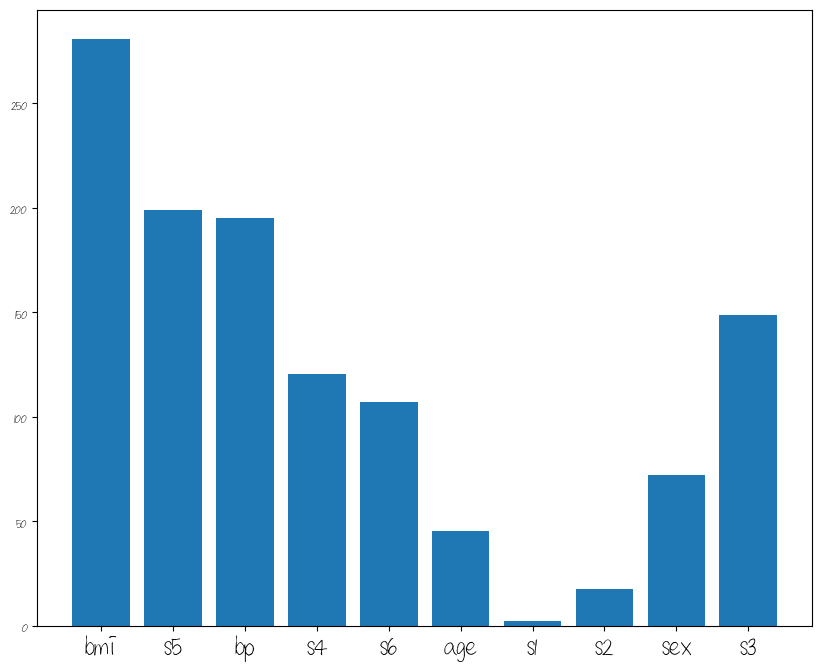

In [49]:

Ridge_coef = pd.Series(model_Ridge.coef_, index=diab.feature_names)
Ridge_coef = Ridge_coef.sort_values(ascending=False)
Ridge_coef = np.abs(Ridge_coef)
# 시각화
plt.figure(figsize=(10,8))

plt.bar(Ridge_coef.index, Ridge_coef.values)
plt.xticks(fontsize=20)
plt.show() #회귀계수가 미치는 영향력이 작아짐을 확인할 수 있다.

In [53]:
y_test.shape

(133,)

In [55]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.001, 0.01, 1, 10, 100]
for alpha in alpha_list:
    model_Ridge = Ridge(alpha)
    model_Ridge.fit(X_train,y_train)
    y_pred = model_Ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    get_score(y_test,y_pred)
    col_name = f'Ridge(alpha={alpha})'
    comp_df[col_name] = np.append(model_Ridge.coef_, r2)

mse is 2820.61
rmse is 53.11
r2 is 0.48
mse is 2819.69
rmse is 53.1
r2 is 0.48
mse is 3112.97
rmse is 55.79
r2 is 0.42
mse is 4580.11
rmse is 67.68
r2 is 0.15
mse is 5318.58
rmse is 72.93
r2 is 0.01


In [56]:
comp_df

,LR,Ridge(alpha=0.001),Ridge(alpha=0.01),Ridge(alpha=1),Ridge(alpha=10),Ridge(alpha=100)
age,29.254013,30.280020,34.167328,45.054210,16.230889,2.072848
sex,-261.706469,-260.634036,-254.043316,-71.947397,-2.961367,-0.003808
bmi,546.299723,548.037053,550.844882,280.716252,59.524160,6.899915
bp,388.398341,386.916776,379.126708,195.212662,43.421300,5.085100
s1,-901.959668,-794.289176,-404.253263,-2.229303,13.875073,2.069660
s2,506.763241,423.104550,123.029219,-17.540797,10.865267,1.743748
s3,121.154351,73.363115,-99.041674,-148.688862,-37.495847,-4.508876
s4,288.035267,272.645792,215.032624,120.467240,38.728538,4.902421
s5,659.268951,617.161295,463.842634,198.614401,49.224746,5.926496
s6,41.376701,42.904834,50.351490,106.934692,34.737987,4.328698


# 2. 라쏘 모델

In [57]:
# from sklearn.linear_model import lasso
# alpha = 1
model_Lasso = Lasso(alpha=1)
model_Lasso.fit(X_train, y_train)

0.36189802861957876

In [61]:
# 라쏘 선형회귀 모델 평가(alpha=1)
# 선형 모델 평가
y_pred = model_Lasso.predict(X_test)
r2= r2_score(y_test, y_pred)
print(r2)
#a = 1 라쏘 모델 회귀 계수
Lasso_coef = pd.Series(model_Lasso.coef_,index=diab.feature_names)

0.36189802861957876


- 계수 시각화

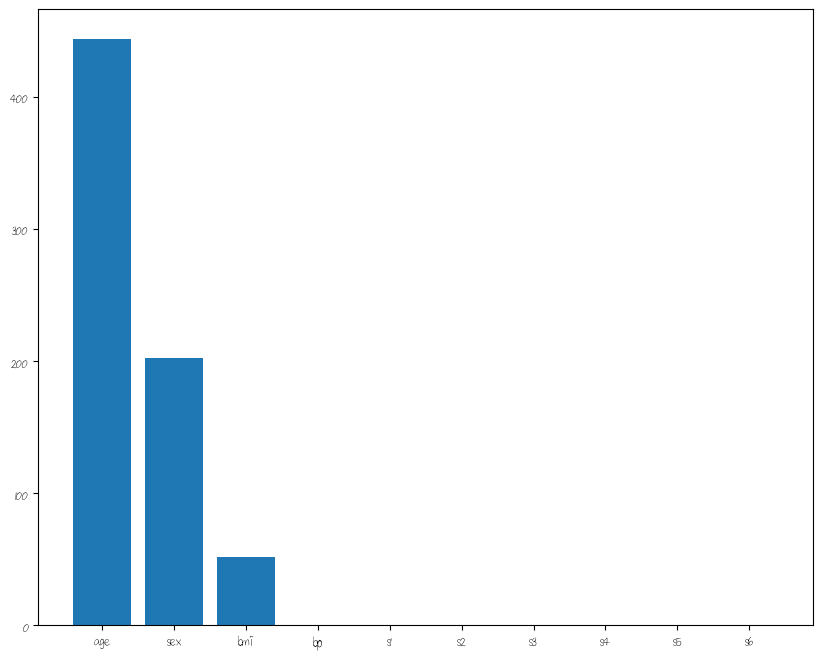

In [62]:
Lasso_coef = Lasso_coef.sort_values(ascending=False)
Lasso_coef = np.abs(Lasso_coef)
# 시각화
plt.figure(figsize=(10,8))
plt.bar(diab.feature_names, Lasso_coef.values)
plt.show()

In [63]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.001, 0.01, 1, 10, 100]
for alpha in alpha_list:
    model_Lasso = Lasso(alpha)
    model_Lasso.fit(X_train,y_train)
    y_pred = model_Lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    get_score(y_test,y_pred)
    col_name = f'Lasso(alpha={alpha})'
    comp_df[col_name] = np.append(model_Lasso.coef_, r2)
comp_df

mse is 2820.4
rmse is 53.11
r2 is 0.48
mse is 2814.06
rmse is 53.05
r2 is 0.48
mse is 3444.67
rmse is 58.69
r2 is 0.36
mse is 5432.89
rmse is 73.71
r2 is -0.01
mse is 5432.89
rmse is 73.71
r2 is -0.01


,LR,Ridge(alpha=0.001),Ridge(alpha=0.01),Ridge(alpha=1),Ridge(alpha=10),Ridge(alpha=100),Lasso(alpha=0.001),Lasso(alpha=0.01),Lasso(alpha=1),Lasso(alpha=10),Lasso(alpha=100)
age,29.254013,30.280020,34.167328,45.054210,16.230889,2.072848,29.392000,28.246364,0.000000,0.000000,0.000000
sex,-261.706469,-260.634036,-254.043316,-71.947397,-2.961367,-0.003808,-260.685721,-250.819184,-0.000000,0.000000,0.000000
bmi,546.299723,548.037053,550.844882,280.716252,59.524160,6.899915,547.389419,556.215874,443.703388,0.000000,0.000000
bp,388.398341,386.916776,379.126708,195.212662,43.421300,5.085100,387.424955,380.659502,51.601094,0.000000,0.000000
s1,-901.959668,-794.289176,-404.253263,-2.229303,13.875073,2.069660,-837.831776,-468.739540,0.000000,0.000000,0.000000
s2,506.763241,423.104550,123.029219,-17.540797,10.865267,1.743748,458.404594,166.993417,0.000000,0.000000,0.000000
s3,121.154351,73.363115,-99.041674,-148.688862,-37.495847,-4.508876,90.646780,-60.219459,-0.000000,-0.000000,-0.000000
s4,288.035267,272.645792,215.032624,120.467240,38.728538,4.902421,275.688793,230.916253,0.000000,0.000000,0.000000
s5,659.268951,617.161295,463.842634,198.614401,49.224746,5.926496,635.389200,492.634358,201.966478,0.000000,0.000000
s6,41.376701,42.904834,50.351490,106.934692,34.737987,4.328698,41.770436,43.969346,0.000000,0.000000,0.000000


In [64]:
comp_df

,LR,Ridge(alpha=0.001),Ridge(alpha=0.01),Ridge(alpha=1),Ridge(alpha=10),Ridge(alpha=100),Lasso(alpha=0.001),Lasso(alpha=0.01),Lasso(alpha=1),Lasso(alpha=10),Lasso(alpha=100)
age,29.254013,30.280020,34.167328,45.054210,16.230889,2.072848,29.392000,28.246364,0.000000,0.000000,0.000000
sex,-261.706469,-260.634036,-254.043316,-71.947397,-2.961367,-0.003808,-260.685721,-250.819184,-0.000000,0.000000,0.000000
bmi,546.299723,548.037053,550.844882,280.716252,59.524160,6.899915,547.389419,556.215874,443.703388,0.000000,0.000000
bp,388.398341,386.916776,379.126708,195.212662,43.421300,5.085100,387.424955,380.659502,51.601094,0.000000,0.000000
s1,-901.959668,-794.289176,-404.253263,-2.229303,13.875073,2.069660,-837.831776,-468.739540,0.000000,0.000000,0.000000
s2,506.763241,423.104550,123.029219,-17.540797,10.865267,1.743748,458.404594,166.993417,0.000000,0.000000,0.000000
s3,121.154351,73.363115,-99.041674,-148.688862,-37.495847,-4.508876,90.646780,-60.219459,-0.000000,-0.000000,-0.000000
s4,288.035267,272.645792,215.032624,120.467240,38.728538,4.902421,275.688793,230.916253,0.000000,0.000000,0.000000
s5,659.268951,617.161295,463.842634,198.614401,49.224746,5.926496,635.389200,492.634358,201.966478,0.000000,0.000000
s6,41.376701,42.904834,50.351490,106.934692,34.737987,4.328698,41.770436,43.969346,0.000000,0.000000,0.000000


# 3. 엘라스틱넷 모델

In [66]:
from sklearn.linear_model import ElasticNet
# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)
model_ElasticNet = ElasticNet(alpha=0.1, l1_ratio =0.5)
model_ElasticNet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [91]:
#모델 평가 및 회귀 계수 확인
# 엘라스틱넷 선형회귀 모델 평가(alpha=1, L1_ratio=0.5)
# 선형 모델 평가
y_pred = model_ElasticNet.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

#a = 1 엘라스틱넷 모델 회귀 계수
ElasticNet_coef = pd.Series(model_ElasticNet.coef_, index=diab.feature_names)
ElasticNet_coef

-0.006405449804164132


age    0.0
sex    0.0
bmi    0.0
bp     0.0
s1     0.0
s2     0.0
s3    -0.0
s4     0.0
s5     0.0
s6     0.0
dtype: float64

- 계수 시각화

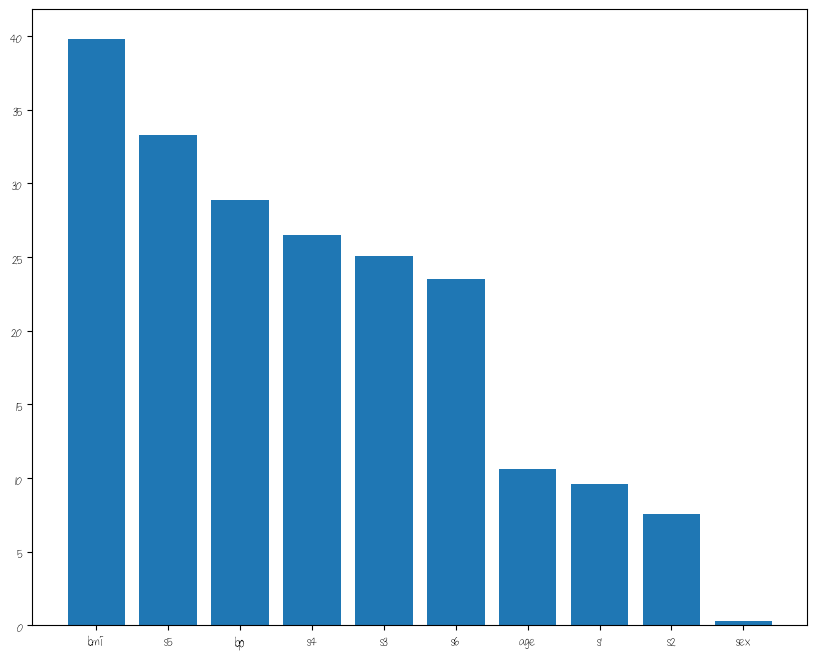

In [70]:
ElasticNet_coef = ElasticNet_coef.sort_values(ascending=False)
ElasticNet_coef = np.abs(ElasticNet_coef)
# 시각화
plt.figure(figsize=(10,8))
plt.bar(ElasticNet_coef.index,ElasticNet_coef)
plt.show()

In [71]:
# alpha_list=[0.01, 1, 10, 100]인 경우, l1_ratio=0.5 
alpha_list = [0.001, 0.01, 0,1, 1, 10, 100]
for alpha in alpha_list:
    model_ElasticNet = ElasticNet(alpha=alpha)
    model_ElasticNet.fit(X_train,y_train)
    y_pred = model_ElasticNet.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    get_score(y_test,y_pred)
    col_name = f'Elastic(alpha={alpha})'
    comp_df[col_name] = np.append(model_ElasticNet.coef_, r2)
comp_df

mse is 2806.79
rmse is 52.98
r2 is 0.48
mse is 3323.0
rmse is 57.65
r2 is 0.38
mse is 2821.75
rmse is 53.12
r2 is 0.48
mse is 5381.54
rmse is 73.36
r2 is 0.0
mse is 5381.54
rmse is 73.36
r2 is 0.0
mse is 5432.89
rmse is 73.71
r2 is -0.01
mse is 5432.89
rmse is 73.71
r2 is -0.01


,LR,Ridge(alpha=0.001),Ridge(alpha=0.01),Ridge(alpha=1),Ridge(alpha=10),Ridge(alpha=100),Lasso(alpha=0.001),Lasso(alpha=0.01),Lasso(alpha=1),Lasso(alpha=10),Lasso(alpha=100),Elastic(alpha=0.001),Elastic(alpha=0.01),Elastic(alpha=0),Elastic(alpha=1),Elastic(alpha=10),Elastic(alpha=100)
age,29.254013,30.280020,34.167328,45.054210,16.230889,2.072848,29.392000,28.246364,0.000000,0.000000,0.000000,41.062411,41.417999,29.254013,0.367567,0.000000,0.000000
sex,-261.706469,-260.634036,-254.043316,-71.947397,-2.961367,-0.003808,-260.685721,-250.819184,-0.000000,0.000000,0.000000,-194.697737,-45.935016,-261.706469,0.000000,0.000000,0.000000
bmi,546.299723,548.037053,550.844882,280.716252,59.524160,6.899915,547.389419,556.215874,443.703388,0.000000,0.000000,480.350838,225.053463,546.299723,3.512046,0.000000,0.000000
bp,388.398341,386.916776,379.126708,195.212662,43.421300,5.085100,387.424955,380.659502,51.601094,0.000000,0.000000,324.384414,158.163233,388.398341,2.328646,0.000000,0.000000
s1,-901.959668,-794.289176,-404.253263,-2.229303,13.875073,2.069660,-837.831776,-468.739540,0.000000,0.000000,0.000000,-83.383318,9.021067,-901.959664,0.380194,0.000000,0.000000
s2,506.763241,423.104550,123.029219,-17.540797,10.865267,1.743748,458.404594,166.993417,0.000000,0.000000,0.000000,-72.673949,-1.762029,506.763238,0.168337,0.000000,0.000000
s3,121.154351,73.363115,-99.041674,-148.688862,-37.495847,-4.508876,90.646780,-60.219459,-0.000000,-0.000000,-0.000000,-211.554636,-124.240022,121.154349,-1.955958,-0.000000,-0.000000
s4,288.035267,272.645792,215.032624,120.467240,38.728538,4.902421,275.688793,230.916253,0.000000,0.000000,0.000000,153.069206,106.910117,288.035266,2.228128,0.000000,0.000000
s5,659.268951,617.161295,463.842634,198.614401,49.224746,5.926496,635.389200,492.634358,201.966478,0.000000,0.000000,313.657355,165.006085,659.268949,2.887428,0.000000,0.000000
s6,41.376701,42.904834,50.351490,106.934692,34.737987,4.328698,41.770436,43.969346,0.000000,0.000000,0.000000,87.211172,97.213477,41.376701,1.846225,0.000000,0.000000


### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [72]:
#LassoCV()에 필요한 매개변수 설정
#0.01 ~ 9.91 까지 alpha_list  생성
cv = 5
alpha_list = np.arange(0.01, 10, 0.01)
max_iter = 1000


In [74]:
model_Lasso_cv = LassoCV(alphas = alpha_list, cv=5, max_iter=max_iter, n_jobs= -1, random_state=42)
model_Lasso_cv

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67...
       9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34, 9.35,
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=5, n_jobs=-1, random_state=42)

- 모델 학습

In [75]:
model_Lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67...
       9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34, 9.35,
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=5, n_jobs=-1, random_state=42)

In [76]:
model_Lasso_cv.alpha_ #0.01일때 제일 좋은 모델이었음!

0.01

In [80]:
'''
이렇게 해도 되긴 합니다!
best_model = Lasso(alpha=0.01)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
하지만 이미 제일 좋은 상태로 돌려놔서 바로 예측을 하면 됩니다!
'''
y_pred = model_Lasso_cv.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.47871428812904404

## GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV
model = ElasticNet()
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10],
              'l1_ratio':[0.1, 0.3, 0.6, 0.9]} 
GSC=GridSearchCV(model,param_grid=param_grid, cv=3)

In [82]:
GSC.fit(X_train,y_train) # 이게 베스트 모델이 됨.

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.3, 0.6, 0.9]})

In [83]:
y_pred = GSC.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.48041149400087013

In [84]:
GSC.best_params_ # 제일 좋은 엘라스틱함수

{'alpha': 0.001, 'l1_ratio': 0.6}

In [92]:
pd.DataFrame(GSC.cv_results_).info() # split 라운드!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      20 non-null     float64
 1   std_fit_time       20 non-null     float64
 2   mean_score_time    20 non-null     float64
 3   std_score_time     20 non-null     float64
 4   param_alpha        20 non-null     object 
 5   param_l1_ratio     20 non-null     object 
 6   params             20 non-null     object 
 7   split0_test_score  20 non-null     float64
 8   split1_test_score  20 non-null     float64
 9   split2_test_score  20 non-null     float64
 10  mean_test_score    20 non-null     float64
 11  std_test_score     20 non-null     float64
 12  rank_test_score    20 non-null     int32  
dtypes: float64(9), int32(1), object(3)
memory usage: 2.1+ KB


In [94]:
pd.DataFrame(GSC.cv_results_).rank_test_score #등수를 볼 수 있음

0      4
1      3
2      1
3      2
4      8
5      7
6      6
7      5
8     12
9     11
10    10
11     9
12    16
13    15
14    14
15    13
16    17
17    18
18    18
19    18
Name: rank_test_score, dtype: int32

## [응용] 보스턴 주택가격 데이터를 활용하여, 규제가 없을때, 리지, 라쏘, 엘라스틱넷 선형회귀를 수행하고 각각의 회귀계수 및 예측 성능을 비교하라
테스트 사이즈:0.3
random_state=42
